In [2]:
import sys
import os
import pandas as pd
import numpy as np
import glob
import random
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

In [3]:
p=0.02
path = r"LUIDS"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, skiprows=lambda i : i > 0 and random.random() > p)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,1430.142857,733,27730,786,9200.0,1.354387,7,5,6,786,56330.0,1609554102751255,160955409273819,38549.914,benign,10.013065
1,491.803279,14310,651,786,56998.0,2.301713,32,61,6,786,9300.0,1609554062195696,1609554032161776,34435.930,benign,30.033920
2,1752.562500,1433,56323,786,9200.0,0.892639,16,11,6,786,56318.0,1609554222822587,1609554194777862,51555.240,benign,28.044725
3,0.000000,0,0,786,40016.0,0.000000,1,1,6,786,9300.0,1609554198019491,1609554198019446,0.000,benign,0.000045
4,1.500000,324,17689,786,9200.0,1.733137,6,3,6,786,56330.0,1609554503947164,1609554503937006,31219.006,benign,0.010158


In [4]:
if 'Label' in frame.columns:
    df = frame.loc[~frame['Label'].isin(['Label'])]
    df.pop('Label')
elif 'label' in frame.columns:
    df = frame.loc[~frame['label'].isin(['label'])]
    df.pop('label')

In [5]:
lab = l.unique()
l_t = {lab[i] : i for i in range(len(lab))}
temp = []
for el in l:
    temp.append(l_t[el] - 1)
l = temp

In [6]:
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].values.astype('float64')
elif 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['timestamp'] = df['timestamp'].values.astype('float64')

In [7]:
for col in df.columns:
    if df[col].dtype == object:
        df.pop(col)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26117 entries, 0 to 26116
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   avg_ipt        26117 non-null  float64
 1   bytes_in       26117 non-null  int64  
 2   bytes_out      26117 non-null  int64  
 3   dest_ip        26117 non-null  int64  
 4   dest_port      25805 non-null  float64
 5   entropy        26117 non-null  float64
 6   num_pkts_out   26117 non-null  int64  
 7   num_pkts_in    26117 non-null  int64  
 8   proto          26117 non-null  int64  
 9   src_ip         26117 non-null  int64  
 10  src_port       25805 non-null  float64
 11  time_end       26117 non-null  int64  
 12  time_start     26117 non-null  int64  
 13  total_entropy  26117 non-null  float64
 14  duration       26117 non-null  float64
dtypes: float64(6), int64(9)
memory usage: 3.2 MB


In [9]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0)
df[df < 0] = 0

In [10]:
for col in df.columns:
    if df[col].dtype == np.float64:
        df[col] = round(df[col] * 1000, 0)
        df[col] = df[col].values.astype(np.int64)

Text(0, 0.5, 'Silhouette score')

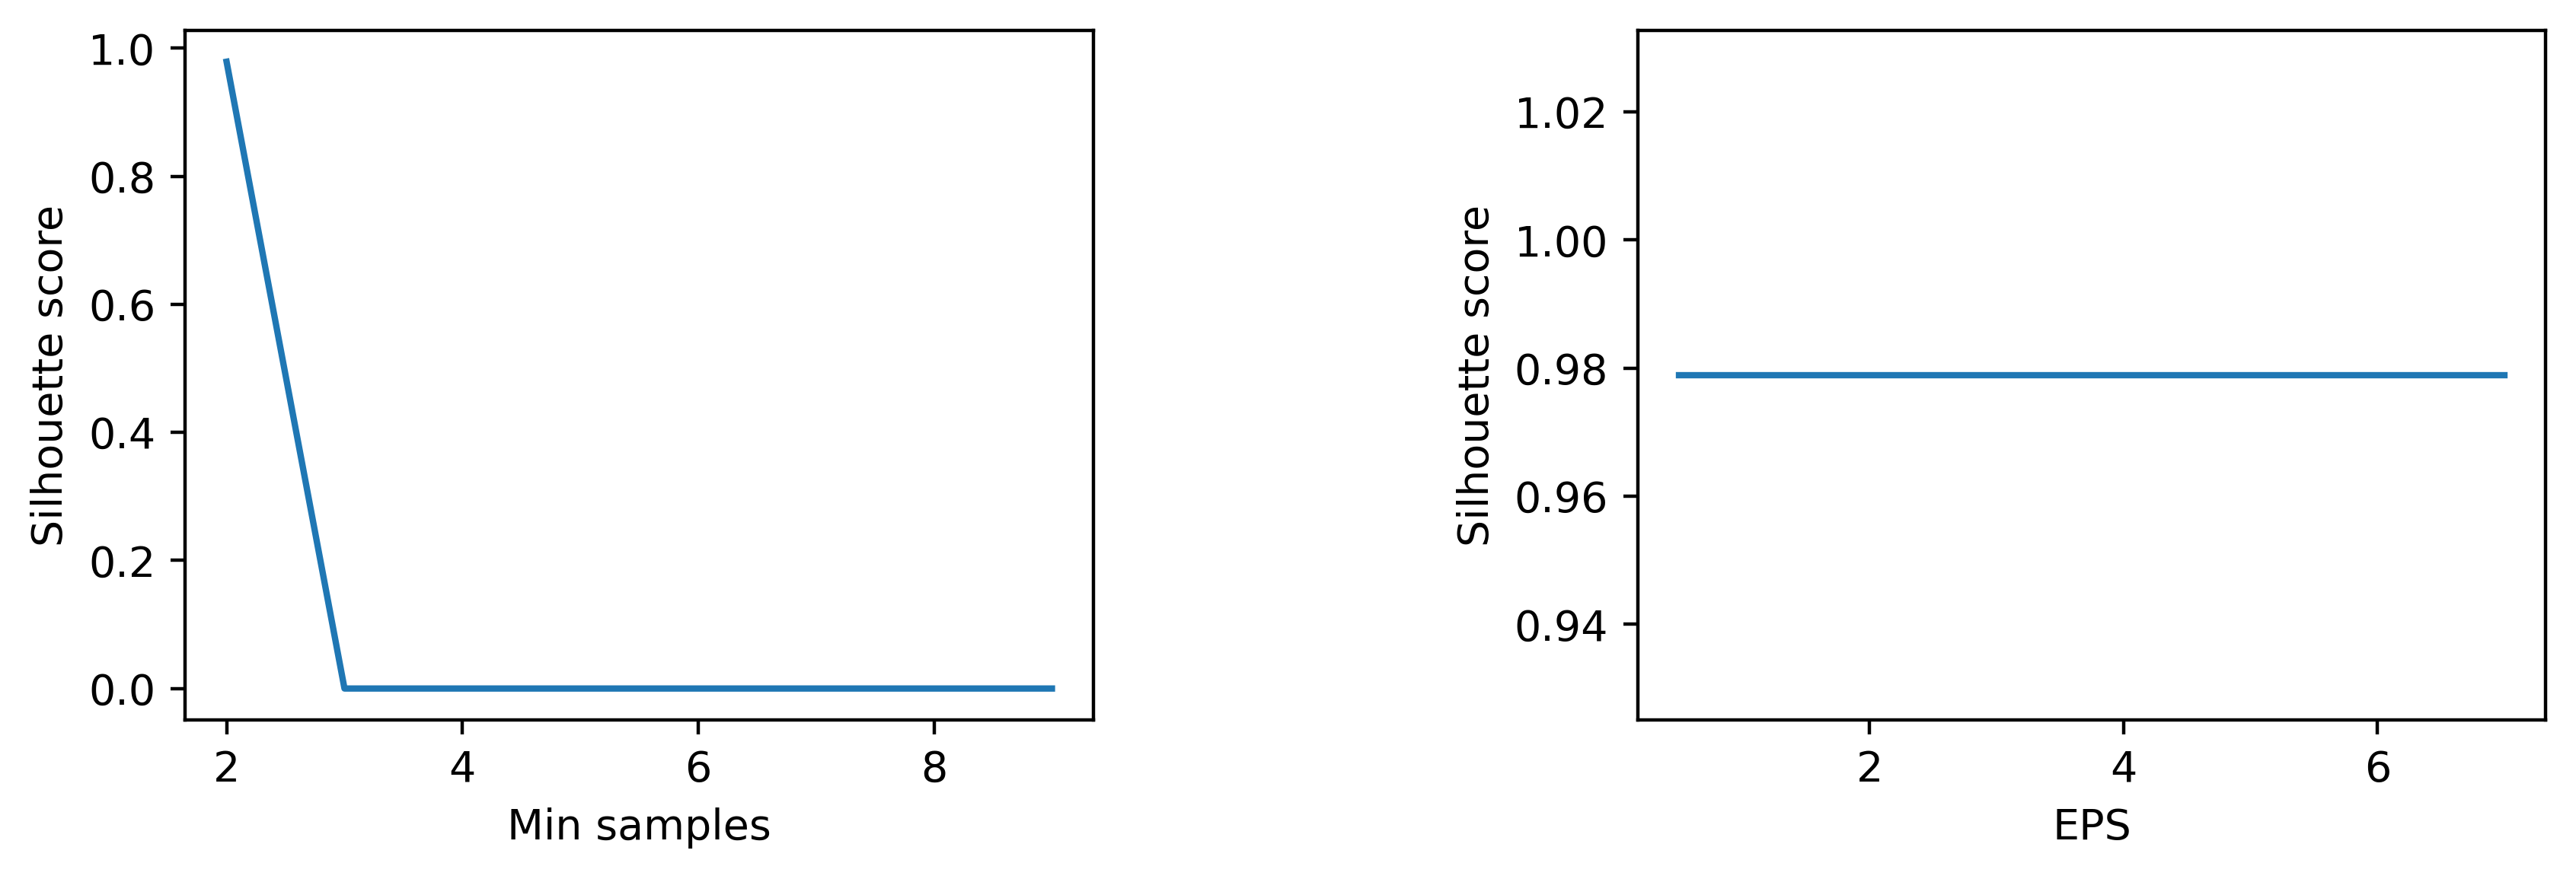

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 3), dpi = 400)
plt.subplots_adjust(wspace=.6)
scores1 = [] 
scores2 = []
min_samp = np.arange(2, 10, 1)
for min_s in min_samp:
    dbs = DBSCAN(eps=1, min_samples=min_s, n_jobs=-1)
    clust = dbs.fit_predict(df)
    if (len(np.unique(clust)) > 1):
        scores1.append(abs(silhouette_score(np.array(df), clust)))
    else:
        scores1.append(0)
ax1.plot(min_samp, scores1)
ax1.set_xlabel('Min samples')
ax1.set_ylabel('Silhouette score')

eps = np.arange(0.5, 7.5, 0.5)
for e in eps:
    dbs = DBSCAN(eps=e, min_samples=2, n_jobs=-1)
    clust = dbs.fit_predict(df)
    if (len(np.unique(clust)) > 1):
        scores2.append(abs(silhouette_score(np.array(df), clust)))
    else:
        scores2.append(0)
ax2.plot(eps, scores2)
ax2.set_xlabel('EPS')
ax2.set_ylabel('Silhouette score')